### Custom Image Data

In [1]:
import numpy as np
import pandas as pd

import torch
import torch.nn as nn
import torch.optim as optim

import os
import torchvision
from torch.utils.data import Dataset,DataLoader,random_split

from skimage import io
import torchvision.transforms as transforms

In [3]:
data = pd.read_csv("train.csv")
data

,id,species,margin1,margin2,margin3,margin4,margin5,margin6,margin7,margin8,...,texture55,texture56,texture57,texture58,texture59,texture60,texture61,texture62,texture63,texture64
0,1,Acer_Opalus,0.007812,0.023438,0.023438,0.003906,0.011719,0.009766,0.027344,0.0,...,0.007812,0.000000,0.002930,0.002930,0.035156,0.000000,0.000000,0.004883,0.000000,0.025391
1,2,Pterocarya_Stenoptera,0.005859,0.000000,0.031250,0.015625,0.025391,0.001953,0.019531,0.0,...,0.000977,0.000000,0.000000,0.000977,0.023438,0.000000,0.000000,0.000977,0.039062,0.022461
2,3,Quercus_Hartwissiana,0.005859,0.009766,0.019531,0.007812,0.003906,0.005859,0.068359,0.0,...,0.154300,0.000000,0.005859,0.000977,0.007812,0.000000,0.000000,0.000000,0.020508,0.002930
3,5,Tilia_Tomentosa,0.000000,0.003906,0.023438,0.005859,0.021484,0.019531,0.023438,0.0,...,0.000000,0.000977,0.000000,0.000000,0.020508,0.000000,0.000000,0.017578,0.000000,0.047852
4,6,Quercus_Variabilis,0.005859,0.003906,0.048828,0.009766,0.013672,0.015625,0.005859,0.0,...,0.096680,0.000000,0.021484,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.031250
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
985,1575,Magnolia_Salicifolia,0.060547,0.119140,0.007812,0.003906,0.000000,0.148440,0.017578,0.0,...,0.242190,0.000000,0.034180,0.000000,0.010742,0.000000,0.000000,0.000000,0.000000,0.018555
986,1578,Acer_Pictum,0.001953,0.003906,0.021484,0.107420,0.001953,0.000000,0.000000,0.0,...,0.170900,0.000000,0.018555,0.000000,0.011719,0.000000,0.000000,0.000977,0.000000,0.021484
987,1581,Alnus_Maximowiczii,0.001953,0.003906,0.000000,0.021484,0.078125,0.003906,0.007812,0.0,...,0.004883,0.000977,0.004883,0.027344,0.016602,0.007812,0.000000,0.027344,0.000000,0.001953
988,1582,Quercus_Rubra,0.000000,0.000000,0.046875,0.056641,0.009766,0.000000,0.000000,0.0,...,0.083008,0.030273,0.000977,0.002930,0.014648,0.000000,0.041992,0.000000,0.001953,0.002930


In [5]:
data.loc[:,['id','species']]

,id,species
0,1,Acer_Opalus
1,2,Pterocarya_Stenoptera
2,3,Quercus_Hartwissiana
3,5,Tilia_Tomentosa
4,6,Quercus_Variabilis
...,...,...
985,1575,Magnolia_Salicifolia
986,1578,Acer_Pictum
987,1581,Alnus_Maximowiczii
988,1582,Quercus_Rubra


In [7]:
csv_file = "train.csv"

data = pd.read_csv(csv_file)
data

,id,species,margin1,margin2,margin3,margin4,margin5,margin6,margin7,margin8,...,texture55,texture56,texture57,texture58,texture59,texture60,texture61,texture62,texture63,texture64
0,1,Acer_Opalus,0.007812,0.023438,0.023438,0.003906,0.011719,0.009766,0.027344,0.0,...,0.007812,0.000000,0.002930,0.002930,0.035156,0.000000,0.000000,0.004883,0.000000,0.025391
1,2,Pterocarya_Stenoptera,0.005859,0.000000,0.031250,0.015625,0.025391,0.001953,0.019531,0.0,...,0.000977,0.000000,0.000000,0.000977,0.023438,0.000000,0.000000,0.000977,0.039062,0.022461
2,3,Quercus_Hartwissiana,0.005859,0.009766,0.019531,0.007812,0.003906,0.005859,0.068359,0.0,...,0.154300,0.000000,0.005859,0.000977,0.007812,0.000000,0.000000,0.000000,0.020508,0.002930
3,5,Tilia_Tomentosa,0.000000,0.003906,0.023438,0.005859,0.021484,0.019531,0.023438,0.0,...,0.000000,0.000977,0.000000,0.000000,0.020508,0.000000,0.000000,0.017578,0.000000,0.047852
4,6,Quercus_Variabilis,0.005859,0.003906,0.048828,0.009766,0.013672,0.015625,0.005859,0.0,...,0.096680,0.000000,0.021484,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.031250
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
985,1575,Magnolia_Salicifolia,0.060547,0.119140,0.007812,0.003906,0.000000,0.148440,0.017578,0.0,...,0.242190,0.000000,0.034180,0.000000,0.010742,0.000000,0.000000,0.000000,0.000000,0.018555
986,1578,Acer_Pictum,0.001953,0.003906,0.021484,0.107420,0.001953,0.000000,0.000000,0.0,...,0.170900,0.000000,0.018555,0.000000,0.011719,0.000000,0.000000,0.000977,0.000000,0.021484
987,1581,Alnus_Maximowiczii,0.001953,0.003906,0.000000,0.021484,0.078125,0.003906,0.007812,0.0,...,0.004883,0.000977,0.004883,0.027344,0.016602,0.007812,0.000000,0.027344,0.000000,0.001953
988,1582,Quercus_Rubra,0.000000,0.000000,0.046875,0.056641,0.009766,0.000000,0.000000,0.0,...,0.083008,0.030273,0.000977,0.002930,0.014648,0.000000,0.041992,0.000000,0.001953,0.002930


In [10]:
data.iloc[:,:2]

,id,species
0,1,Acer_Opalus
1,2,Pterocarya_Stenoptera
2,3,Quercus_Hartwissiana
3,5,Tilia_Tomentosa
4,6,Quercus_Variabilis
...,...,...
985,1575,Magnolia_Salicifolia
986,1578,Acer_Pictum
987,1581,Alnus_Maximowiczii
988,1582,Quercus_Rubra


In [9]:
dict = data.iloc[:,:2].to_dict()
dict

{'id': {0: 1,
  1: 2,
  2: 3,
  3: 5,
  4: 6,
  5: 8,
  6: 10,
  7: 11,
  8: 14,
  9: 15,
  10: 17,
  11: 18,
  12: 20,
  13: 21,
  14: 22,
  15: 25,
  16: 26,
  17: 27,
  18: 29,
  19: 30,
  20: 31,
  21: 32,
  22: 34,
  23: 35,
  24: 37,
  25: 38,
  26: 40,
  27: 42,
  28: 43,
  29: 45,
  30: 48,
  31: 49,
  32: 50,
  33: 54,
  34: 55,
  35: 56,
  36: 58,
  37: 60,
  38: 61,
  39: 63,
  40: 64,
  41: 66,
  42: 67,
  43: 69,
  44: 71,
  45: 72,
  46: 73,
  47: 75,
  48: 76,
  49: 78,
  50: 80,
  51: 81,
  52: 82,
  53: 83,
  54: 84,
  55: 85,
  56: 87,
  57: 88,
  58: 92,
  59: 100,
  60: 101,
  61: 103,
  62: 106,
  63: 107,
  64: 108,
  65: 109,
  66: 115,
  67: 116,
  68: 118,
  69: 120,
  70: 122,
  71: 124,
  72: 127,
  73: 129,
  74: 130,
  75: 132,
  76: 133,
  77: 134,
  78: 139,
  79: 140,
  80: 142,
  81: 143,
  82: 145,
  83: 146,
  84: 148,
  85: 149,
  86: 152,
  87: 153,
  88: 155,
  89: 160,
  90: 163,
  91: 164,
  92: 165,
  93: 166,
  94: 167,
  95: 168,
  96: 169,
  

In [11]:
ids = dict["id"]
ids

{0: 1,
 1: 2,
 2: 3,
 3: 5,
 4: 6,
 5: 8,
 6: 10,
 7: 11,
 8: 14,
 9: 15,
 10: 17,
 11: 18,
 12: 20,
 13: 21,
 14: 22,
 15: 25,
 16: 26,
 17: 27,
 18: 29,
 19: 30,
 20: 31,
 21: 32,
 22: 34,
 23: 35,
 24: 37,
 25: 38,
 26: 40,
 27: 42,
 28: 43,
 29: 45,
 30: 48,
 31: 49,
 32: 50,
 33: 54,
 34: 55,
 35: 56,
 36: 58,
 37: 60,
 38: 61,
 39: 63,
 40: 64,
 41: 66,
 42: 67,
 43: 69,
 44: 71,
 45: 72,
 46: 73,
 47: 75,
 48: 76,
 49: 78,
 50: 80,
 51: 81,
 52: 82,
 53: 83,
 54: 84,
 55: 85,
 56: 87,
 57: 88,
 58: 92,
 59: 100,
 60: 101,
 61: 103,
 62: 106,
 63: 107,
 64: 108,
 65: 109,
 66: 115,
 67: 116,
 68: 118,
 69: 120,
 70: 122,
 71: 124,
 72: 127,
 73: 129,
 74: 130,
 75: 132,
 76: 133,
 77: 134,
 78: 139,
 79: 140,
 80: 142,
 81: 143,
 82: 145,
 83: 146,
 84: 148,
 85: 149,
 86: 152,
 87: 153,
 88: 155,
 89: 160,
 90: 163,
 91: 164,
 92: 165,
 93: 166,
 94: 167,
 95: 168,
 96: 169,
 97: 171,
 98: 173,
 99: 175,
 100: 178,
 101: 179,
 102: 183,
 103: 186,
 104: 188,
 105: 189,
 106: 190

In [13]:
classes = data["species"].unique()
len(classes)

99

In [16]:
class_to_idx = {j: i for i, j in enumerate(classes)}
class_to_idx

{'Acer_Opalus': 0,
 'Pterocarya_Stenoptera': 1,
 'Quercus_Hartwissiana': 2,
 'Tilia_Tomentosa': 3,
 'Quercus_Variabilis': 4,
 'Magnolia_Salicifolia': 5,
 'Quercus_Canariensis': 6,
 'Quercus_Rubra': 7,
 'Quercus_Brantii': 8,
 'Salix_Fragilis': 9,
 'Zelkova_Serrata': 10,
 'Betula_Austrosinensis': 11,
 'Quercus_Pontica': 12,
 'Quercus_Afares': 13,
 'Quercus_Coccifera': 14,
 'Fagus_Sylvatica': 15,
 'Phildelphus': 16,
 'Acer_Palmatum': 17,
 'Quercus_Pubescens': 18,
 'Populus_Adenopoda': 19,
 'Quercus_Trojana': 20,
 'Alnus_Sieboldiana': 21,
 'Quercus_Ilex': 22,
 'Arundinaria_Simonii': 23,
 'Acer_Platanoids': 24,
 'Quercus_Phillyraeoides': 25,
 'Cornus_Chinensis': 26,
 'Liriodendron_Tulipifera': 27,
 'Cytisus_Battandieri': 28,
 'Rhododendron_x_Russellianum': 29,
 'Alnus_Rubra': 30,
 'Eucalyptus_Glaucescens': 31,
 'Cercis_Siliquastrum': 32,
 'Cotinus_Coggygria': 33,
 'Celtis_Koraiensis': 34,
 'Quercus_Crassifolia': 35,
 'Quercus_Kewensis': 36,
 'Cornus_Controversa': 37,
 'Quercus_Pyrenaica': 3

In [17]:
species = dict["species"]
species

{0: 'Acer_Opalus',
 1: 'Pterocarya_Stenoptera',
 2: 'Quercus_Hartwissiana',
 3: 'Tilia_Tomentosa',
 4: 'Quercus_Variabilis',
 5: 'Magnolia_Salicifolia',
 6: 'Quercus_Canariensis',
 7: 'Quercus_Rubra',
 8: 'Quercus_Brantii',
 9: 'Salix_Fragilis',
 10: 'Zelkova_Serrata',
 11: 'Betula_Austrosinensis',
 12: 'Quercus_Pontica',
 13: 'Quercus_Afares',
 14: 'Quercus_Coccifera',
 15: 'Fagus_Sylvatica',
 16: 'Phildelphus',
 17: 'Acer_Palmatum',
 18: 'Quercus_Pubescens',
 19: 'Populus_Adenopoda',
 20: 'Quercus_Trojana',
 21: 'Quercus_Variabilis',
 22: 'Alnus_Sieboldiana',
 23: 'Quercus_Ilex',
 24: 'Arundinaria_Simonii',
 25: 'Acer_Platanoids',
 26: 'Quercus_Phillyraeoides',
 27: 'Cornus_Chinensis',
 28: 'Quercus_Phillyraeoides',
 29: 'Fagus_Sylvatica',
 30: 'Liriodendron_Tulipifera',
 31: 'Cytisus_Battandieri',
 32: 'Tilia_Tomentosa',
 33: 'Rhododendron_x_Russellianum',
 34: 'Alnus_Rubra',
 35: 'Eucalyptus_Glaucescens',
 36: 'Cercis_Siliquastrum',
 37: 'Cotinus_Coggygria',
 38: 'Celtis_Koraiensis

In [18]:
idx = 0

num = ids[idx]
num

1

In [19]:
loc = f"/{num}.jpg"
loc

'/1.jpg'

In [20]:
label = dict["species"][idx]
label

'Acer_Opalus'

In [21]:
label = class_to_idx[label]
label

0

In [23]:
path_leaf = "images"
path_leaf + loc

'images/1.jpg'

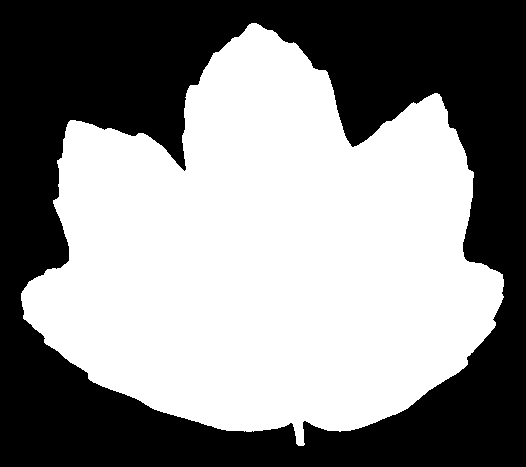

In [26]:
from PIL import Image

image = Image.open(path_leaf + loc)
image

In [28]:
image.size

(526, 467)

In [29]:
label

0

In [7]:
class LeafLoader(Dataset):
    """Loads the Leaf Classification dataset."""

    def __init__(self, csv_file, transform=None):
        self.data = pd.read_csv(csv_file)
        self.transform = transform

        # First 2 columns contains the id for the image and the class of the image
        self.dict = self.data.iloc[:,:2].to_dict()
        # When we index we want to get the id
        self.ids = self.dict["id"]
        
        # List of unique class names
        self.classes = self.data["species"].unique() 
        self.class_to_idx = {j: i for i, j in enumerate(self.classes)}
        
        # Assigns number to every class in the order which it appears in the data
        self.species = self.dict["species"]
        
        # Use this go back to class name from index of the class name
        self.path_leaf = "images" # Where the images are stored (folder_name)

    def __len__(self):
        return len(self.data)

    def __getitem__(self, idx):

        if torch.is_tensor(idx):
            idx = idx.item()
            assert isinstance(idx, int)

        num = self.ids[idx] # Id of the indexed item
        loc = f"/{num}.jpg"
        label = self.dict["species"][idx] # Find the label/class of the image at given index
        label = self.class_to_idx[label] # Convert it to int
        image = Image.open(self.path_leaf + loc)
        if self.transform:
            image = self.transform(image)

        return (image, label)

In [8]:
train_path = "train.csv"

image_size = (28,28)
normalize = ((0.5), (0.5))

transform = transforms.Compose([transforms.Resize(image_size),transforms.ToTensor(), 
                                transforms.Normalize(*normalize)])

dataset = LeafLoader(train_path,transform)

train_size = int(0.8 * len(dataset)) # 80% of the data to be used for training
test_size = len(dataset) - train_size # The remainder for testing
train_dataset, test_dataset = random_split(dataset, [train_size, test_size])
# Function above takes dataset, and lengths of train,test as input that's what we a supplying here

batch_size = 16
trainloader_dataset = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
testloader_dataset = DataLoader(test_dataset, batch_size=batch_size, shuffle=True)